# Reading data using Pandas

It's time to begin looking at our data!

In this set of notebooks, we use the flight time data for October 2019 obtained from the Bureau of Transportation Statistics (BTS) operated by the US Government. This data can be found [here](https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time)

In [1]:
import numpy
import pandas
import matplotlib.pyplot as pl
%matplotlib inline

Before we can load in our data, we need to know if it is in our current working directory (CWD) and what is the name of the file that hosts the data. To do this, we will use the Python module `os`

In [2]:
import os

In [3]:
#Get the path to the CWD
os.getcwd()

'/home/nspol/Desktop/intro_pandas_and_seaborn'

In [4]:
#Print contents of the CWD:
os.listdir()

['Chap_3_plotting_w_seaborn.ipynb',
 'Chap_4_statistics_w_statsmodels.ipynb',
 'farereportmetadata1.xlsx',
 'Chap_2_Reading_and_massaging_data.ipynb',
 'cy18-commercial-service-enplanements.xlsx',
 'README.md',
 'flight_data_2019-10',
 'Chap_0_look_at_data.ipynb',
 'Chap_1_data_structures.ipynb',
 'L_UNIQUE_CARRIERS.csv',
 '.ipynb_checkpoints',
 '.git',
 'flight_data_2019-10.tar.gz',
 'final_dataset.csv',
 '.gitignore',
 'Consumer_Airfare_Report__Table_6_-_Contiguous_State_City-Pair_Markets_That_Average_At_Least_10_Passengers_Per_Day.csv',
 'workbench.ipynb']

In [5]:
#Read in data:
data = pandas.read_csv("Consumer_Airfare_Report__Table_6_-_Contiguous_State_City-Pair_Markets_That_Average_At_Least_10_Passengers_Per_Day.csv")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Let's take a quick look at the data by looking at the first few entries in the dataframe:
data.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,tbl6pk
0,Table 6,"2,004",2,"33,851","34,027","Oklahoma City, OK","West Palm Beach/Palm Beach, FL","1,197",10.87,242.51,DL,0.51,235.98,DL,0.51,235.98,0,"Oklahoma City, OK\n(35.468494, -97.521264)","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",200423385134027
1,Table 6,"2,003",2,"30,693","34,027","Nashville, TN","West Palm Beach/Palm Beach, FL",758,137.91,136.00,WN,0.73,126.54,WN,0.73,126.54,0,"Nashville, TN\n(36.166687, -86.779932)","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",200323069334027
2,Table 6,"2,004",4,"33,029","33,570","Lincoln, NE","San Diego, CA","1,259",19.45,193.88,UA,0.84,194.65,NW,0.13,176.53,0,"Lincoln, NE\n(40.813599, -96.70261)","San Diego, CA\n(32.71576, -117.163817)",200443302933570
3,Table 6,"2,004",2,"33,198","30,424","Kansas City, MO","Wausau/Mosinee/Stevens Point, WI",459,12.52,199.57,NW,0.70,201.34,UA,0.13,195.58,0,"Kansas City, MO\n(39.099792, -94.578559)","Wausau/Mosinee/Stevens Point, WI\n(38.892062, ...",200423319830424
4,Table 6,"2,003",2,"30,135","30,325","Allentown/Bethlehem/Easton, PA","Denver, CO","1,539",29.01,272.83,UA,0.32,321.47,DL,0.17,201.91,0,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7...","Denver, CO\n(39.738453, -104.984853)",200323013530325


In [7]:
#Get shape of dataset:
data.shape

(520396, 20)

In [8]:
#Let's get all the columns in the dataframe:
col_names = data.columns

print("The columns in the dataframe are {}".format(col_names))

The columns in the dataframe are Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms',
       'fare_lg', 'carrier_low', 'lf_ms', 'fare_low', 'table_1_flag',
       'Geocoded_City1', 'Geocoded_City2', 'tbl6pk'],
      dtype='object')


That last column name looks fishy! Let's take a closer look...

In [9]:
data[col_names[-1]]

0         200423385134027
1         200323069334027
2         200443302933570
3         200423319830424
4         200323013530325
5         200923246734576
6         200843449234986
7         200433105735412
8         200333032534574
9         201323165034685
10        200913014033316
11        200413125231295
12        199613532331057
13        199913294534685
14        200043039733198
15        200923086831454
16        199833289130852
17        200743257534614
18        200823228032457
19        200043366734685
20        201433039731638
21        200443233731650
22        199733064731267
23        201033221133158
24        199733018934492
25        200833042330868
26        200913043131703
27        200843019430559
28        201213014030647
29        201223145430476
               ...       
520366    201933541232575
520367    201933541232600
520368    201933541233192
520369    201933541233195
520370    201933541233214
520371    201933541233244
520372    201933541233316
520373    20

This column seems to have metadata that is not required for our purposes.

Let us drop this column from our dataset. This is a good idea whenever the dataset is large and is a strain on memory.

In [10]:
#To remove a column from a dataframe:
trunc_data = data.drop([col_names[-1]], axis = 1) #Here the axis = 1 tells pandas to drop the column.

#Remember Python is a row-major language! axis = 0 represents operations on rows, 
#while axis = 1 represents operations on columns

trunc_data.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,Table 6,"2,004",2,"33,851","34,027","Oklahoma City, OK","West Palm Beach/Palm Beach, FL","1,197",10.87,242.51,DL,0.51,235.98,DL,0.51,235.98,0,"Oklahoma City, OK\n(35.468494, -97.521264)","West Palm Beach/Palm Beach, FL\n(33.90976, -98..."
1,Table 6,"2,003",2,"30,693","34,027","Nashville, TN","West Palm Beach/Palm Beach, FL",758,137.91,136.00,WN,0.73,126.54,WN,0.73,126.54,0,"Nashville, TN\n(36.166687, -86.779932)","West Palm Beach/Palm Beach, FL\n(33.90976, -98..."
2,Table 6,"2,004",4,"33,029","33,570","Lincoln, NE","San Diego, CA","1,259",19.45,193.88,UA,0.84,194.65,NW,0.13,176.53,0,"Lincoln, NE\n(40.813599, -96.70261)","San Diego, CA\n(32.71576, -117.163817)"
3,Table 6,"2,004",2,"33,198","30,424","Kansas City, MO","Wausau/Mosinee/Stevens Point, WI",459,12.52,199.57,NW,0.70,201.34,UA,0.13,195.58,0,"Kansas City, MO\n(39.099792, -94.578559)","Wausau/Mosinee/Stevens Point, WI\n(38.892062, ..."
4,Table 6,"2,003",2,"30,135","30,325","Allentown/Bethlehem/Easton, PA","Denver, CO","1,539",29.01,272.83,UA,0.32,321.47,DL,0.17,201.91,0,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7...","Denver, CO\n(39.738453, -104.984853)"


In [11]:
trunc_data.shape

(520396, 19)

In [12]:
trunc_col_names = trunc_data.columns

print("New column names are: {}".format(trunc_col_names))

New column names are: Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms',
       'fare_lg', 'carrier_low', 'lf_ms', 'fare_low', 'table_1_flag',
       'Geocoded_City1', 'Geocoded_City2'],
      dtype='object')


*********
### _Exercise_:

In the same line of thought, we also don't need the `tbl` column in our dataset.
- Write code to drop the `tbl` column from our dataset.

***

In [13]:
trunc_data = trunc_data.drop(trunc_col_names[0], axis = 1)

trunc_data.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,"2,004",2,"33,851","34,027","Oklahoma City, OK","West Palm Beach/Palm Beach, FL","1,197",10.87,242.51,DL,0.51,235.98,DL,0.51,235.98,0,"Oklahoma City, OK\n(35.468494, -97.521264)","West Palm Beach/Palm Beach, FL\n(33.90976, -98..."
1,"2,003",2,"30,693","34,027","Nashville, TN","West Palm Beach/Palm Beach, FL",758,137.91,136.00,WN,0.73,126.54,WN,0.73,126.54,0,"Nashville, TN\n(36.166687, -86.779932)","West Palm Beach/Palm Beach, FL\n(33.90976, -98..."
2,"2,004",4,"33,029","33,570","Lincoln, NE","San Diego, CA","1,259",19.45,193.88,UA,0.84,194.65,NW,0.13,176.53,0,"Lincoln, NE\n(40.813599, -96.70261)","San Diego, CA\n(32.71576, -117.163817)"
3,"2,004",2,"33,198","30,424","Kansas City, MO","Wausau/Mosinee/Stevens Point, WI",459,12.52,199.57,NW,0.70,201.34,UA,0.13,195.58,0,"Kansas City, MO\n(39.099792, -94.578559)","Wausau/Mosinee/Stevens Point, WI\n(38.892062, ..."
4,"2,003",2,"30,135","30,325","Allentown/Bethlehem/Easton, PA","Denver, CO","1,539",29.01,272.83,UA,0.32,321.47,DL,0.17,201.91,0,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7...","Denver, CO\n(39.738453, -104.984853)"


In [14]:
trunc_col_names = trunc_data.columns
print(trunc_col_names)

Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'table_1_flag', 'Geocoded_City1',
       'Geocoded_City2'],
      dtype='object')


# Massaging the data

If we look at the data above, we can see that some variables express numbers as `2,019` rather than `2019`. The former implies that this object is interpreted by python (and pandas) as an `object` instead of a `float` which is what we want to do numeric analysis of this dataset.

In [15]:
trunc_data['Year'].head()

0    2,004
1    2,003
2    2,004
3    2,004
4    2,003
Name: Year, dtype: object

We need to remove that comma from these numbers and convert the objects into floats.

In [16]:
test = trunc_data['Year'].replace({',': ''}, regex = True)

In [17]:
test = test.astype('int')

In [18]:
trunc_data['Year'] = test

In [19]:
trunc_data['Year'].head()

0    2004
1    2003
2    2004
3    2004
4    2003
Name: Year, dtype: int64

*********
### _Exercise_:

In the same line of thought, we also want to conver the values in the column 'nsmiles' to float values.
- Write code to do the same conversion for the `nsmiles` column.

__Adavanced__:
If you were able to do the above exercise quickly, try to Google a different way to do the same operation

***

In [20]:
#I'm going to give a different solution here:

#A cleaner way of doing the above is to tell pandas that the ',' is being used for thousands.
#This can be done when reading in the dataset:
data = pandas.read_csv("Consumer_Airfare_Report__Table_6_-_Contiguous_State_City-Pair_Markets_That_Average_At_Least_10_Passengers_Per_Day.csv",
                      thousands = ',')

data.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,tbl6pk
0,Table 6,2004,2,33851,34027,"Oklahoma City, OK","West Palm Beach/Palm Beach, FL",1197,10.87,242.51,DL,0.51,235.98,DL,0.51,235.98,0,"Oklahoma City, OK\n(35.468494, -97.521264)","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",200423385134027
1,Table 6,2003,2,30693,34027,"Nashville, TN","West Palm Beach/Palm Beach, FL",758,137.91,136.00,WN,0.73,126.54,WN,0.73,126.54,0,"Nashville, TN\n(36.166687, -86.779932)","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",200323069334027
2,Table 6,2004,4,33029,33570,"Lincoln, NE","San Diego, CA",1259,19.45,193.88,UA,0.84,194.65,NW,0.13,176.53,0,"Lincoln, NE\n(40.813599, -96.70261)","San Diego, CA\n(32.71576, -117.163817)",200443302933570
3,Table 6,2004,2,33198,30424,"Kansas City, MO","Wausau/Mosinee/Stevens Point, WI",459,12.52,199.57,NW,0.70,201.34,UA,0.13,195.58,0,"Kansas City, MO\n(39.099792, -94.578559)","Wausau/Mosinee/Stevens Point, WI\n(38.892062, ...",200423319830424
4,Table 6,2003,2,30135,30325,"Allentown/Bethlehem/Easton, PA","Denver, CO",1539,29.01,272.83,UA,0.32,321.47,DL,0.17,201.91,0,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7...","Denver, CO\n(39.738453, -104.984853)",200323013530325


In [21]:
data['Year'].head()

0    2004
1    2003
2    2004
3    2004
4    2003
Name: Year, dtype: int64

In [22]:
#Let's drop the columns that need to be dropped:
col_names = data.columns
print(col_names)

Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms',
       'fare_lg', 'carrier_low', 'lf_ms', 'fare_low', 'table_1_flag',
       'Geocoded_City1', 'Geocoded_City2', 'tbl6pk'],
      dtype='object')


In [23]:
trunc_data = data.drop(col_names[[0, -1]], axis = 1)
trunc_data.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2004,2,33851,34027,"Oklahoma City, OK","West Palm Beach/Palm Beach, FL",1197,10.87,242.51,DL,0.51,235.98,DL,0.51,235.98,0,"Oklahoma City, OK\n(35.468494, -97.521264)","West Palm Beach/Palm Beach, FL\n(33.90976, -98..."
1,2003,2,30693,34027,"Nashville, TN","West Palm Beach/Palm Beach, FL",758,137.91,136.00,WN,0.73,126.54,WN,0.73,126.54,0,"Nashville, TN\n(36.166687, -86.779932)","West Palm Beach/Palm Beach, FL\n(33.90976, -98..."
2,2004,4,33029,33570,"Lincoln, NE","San Diego, CA",1259,19.45,193.88,UA,0.84,194.65,NW,0.13,176.53,0,"Lincoln, NE\n(40.813599, -96.70261)","San Diego, CA\n(32.71576, -117.163817)"
3,2004,2,33198,30424,"Kansas City, MO","Wausau/Mosinee/Stevens Point, WI",459,12.52,199.57,NW,0.70,201.34,UA,0.13,195.58,0,"Kansas City, MO\n(39.099792, -94.578559)","Wausau/Mosinee/Stevens Point, WI\n(38.892062, ..."
4,2003,2,30135,30325,"Allentown/Bethlehem/Easton, PA","Denver, CO",1539,29.01,272.83,UA,0.32,321.47,DL,0.17,201.91,0,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7...","Denver, CO\n(39.738453, -104.984853)"


In [24]:
trunc_col_names = trunc_data.columns

In [25]:
print(trunc_col_names)

Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'table_1_flag', 'Geocoded_City1',
       'Geocoded_City2'],
      dtype='object')


# Plot!

Now that we are happy with how the structure of our dataframe, let's make a few plots using pandas' built-in plotting methods to get a feel for our data.

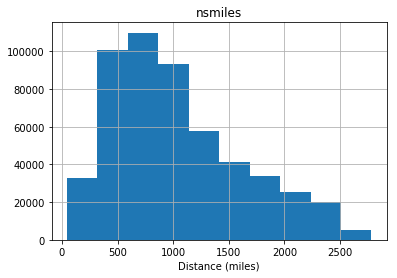

In [26]:
trunc_data.hist(column = 'nsmiles')

pl.xlabel("Distance (miles)")

pl.show()

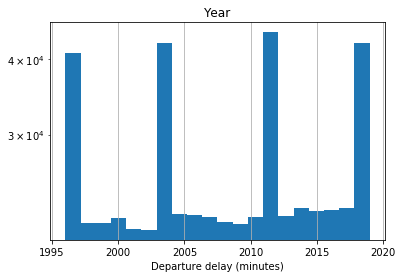

In [27]:
trunc_data.hist(column = "Year", bins = 20)

pl.yscale('log')

pl.xlabel("Departure delay (minutes)")

pl.show()

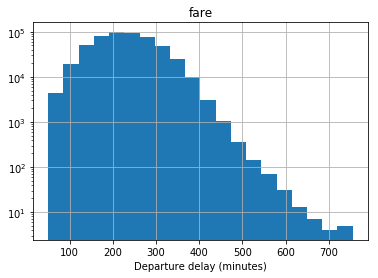

In [28]:
trunc_data.hist(column = "fare", bins = 20)

pl.yscale('log')

pl.xlabel("Departure delay (minutes)")

pl.show()

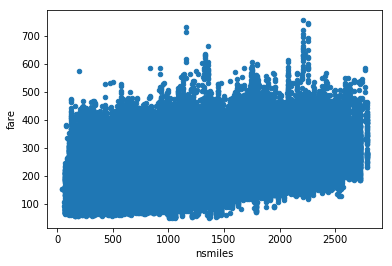

In [29]:
trunc_data.plot(x = 'nsmiles', y = 'fare', kind = 'scatter')

pl.show()

Let's look at which carrier airlines we are looking at and if our favorite airline is in this database

In [30]:
#To find the unique values in a given column:
airlines = trunc_data['carrier_lg'].unique()

print("We have the following airlines: {}".format(airlines))

We have the following airlines: ['DL' 'WN' 'UA' 'NW' 'FL' 'US' 'AA' 'RU' 'CO' 'DH' 'HP' 'AS' 'J7' 'G4' 'JI'
 'B6' 'TW' 'YX' 'F9' 'QX' 'XP' 'NK' nan 'W9' 'QQ' 'SY' 'NJ' 'TZ' 'YV' 'PN'
 'W7' '9N' 'ZW' 'U2' 'SX' 'ZA' 'UK' 'U5' 'WV' 'EV' 'HQ' 'N7' 'XJ' '9E' 'A7'
 'KW' 'OE' 'E9' 'AD' 'OO' 'T3' 'RP' 'KP' 'VX' 'OI']


That's cool, but apart from the most popular airlines, I don't know the acronyms for the others. Let's fix this by reading in an ancillary file that contains expansion of these acronyms.

In [31]:
acronym_data = pandas.read_csv("flight_data_2019-10/L_UNIQUE_CARRIERS.csv")

acronym_data.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [32]:
acronym_data['Code'].unique().shape

(1671,)

As we can see, we have much fewer than 1671 airlines in our dataset. So we need to search our `acronym_data` dataframe to get the airlines we are interested in.

In [33]:
#This can be done with pandas by making masks:
my_airlines_mask = acronym_data['Code'] == airlines[0]
print(my_airlines_mask)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1641    False
1642    False
1643    False
1644    False
1645    False
1646    False
1647    False
1648    False
1649    False
1650    False
1651    False
1652    False
1653    False
1654    False
1655    False
1656    False
1657    False
1658    False
1659    False
1660    False
1661    False
1662    False
1663    False
1664    False
1665    False
1666    False
1667    False
1668    False
1669    False
1670    False
Name: Code, Length: 1671, dtype: bool


In [34]:
#use the above mask to extract the correct row:
acronym_data[my_airlines_mask]

,Code,Description
535,DL,Delta Air Lines Inc.


In [35]:
#Let's do the above, but for all the names we want:

mask = numpy.full((acronym_data.shape[0]), False)

for ii, name in enumerate(airlines):
    mask += acronym_data['Code'] == name

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/usr/local/lib/python3.5/dist-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [36]:
acronym_data[mask]

,Code,Description
166,9E,Endeavor Air Inc.
171,9N,ANA & JP Express Co. Ltd.
180,A7,Air Comet S.A.
182,AA,American Airlines Inc.
216,AD,Azul Linhas Aereas Brazileiras S A
309,AS,Alaska Airlines Inc.
350,B6,JetBlue Airways
467,CO,Continental Air Lines Inc.
527,DH,Independence Air
535,DL,Delta Air Lines Inc.


We would like to have a column in our main dataset that lists the long-form name of each airline along with their acronym (which already exists).

Before we can do this, we need to rename the `Code` column in the `acronym_data` dataframe. 

In [37]:
#To rename a column in a dataframe:
renamed_acronym_data = acronym_data.rename({'Code': 'carrier_lg'}, axis = 1)

renamed_acronym_data.head()

,carrier_lg,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


We did the above so that we could "merge" this dataframe with our original dataset. In doing so, pandas will automatically cross-correlate the `OP_UNIQUE_CARRIER` field in both dataframes (which is why we renamed the column above) and add the description.

In [38]:
trunc_data = trunc_data.merge(renamed_acronym_data, on = ['carrier_lg'])

trunc_data.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,Description
0,2004,2,33851,34027,"Oklahoma City, OK","West Palm Beach/Palm Beach, FL",1197,10.87,242.51,DL,0.51,235.98,DL,0.51,235.98,0,"Oklahoma City, OK\n(35.468494, -97.521264)","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",Delta Air Lines Inc.
1,2008,4,34492,34986,"Raleigh/Durham, NC","Sarasota/Bradenton, FL",625,23.91,165.17,DL,0.47,165.67,FL,0.21,154.50,0,"Raleigh/Durham, NC\n(42.673348, -72.179683)","Sarasota/Bradenton, FL\n(27.336483, -82.538602)",Delta Air Lines Inc.
2,2013,2,31650,34685,"Minneapolis/St. Paul, MN","Savannah, GA",1092,102.85,222.88,DL,0.70,224.80,UA,0.13,175.85,0,"Minneapolis/St. Paul, MN\n(44.977479, -93.264346)","Savannah, GA\n(40.115007, -111.654713)",Delta Air Lines Inc.
3,2004,1,31252,31295,"Daytona Beach, FL","Detroit, MI",908,14.50,240.83,DL,0.87,241.69,CO,0.09,200.07,0,"Daytona Beach, FL\n(29.207056, -81.020739)","Detroit, MI\n(42.332916, -83.047853)",Delta Air Lines Inc.
4,1999,1,32945,34685,"Lexington, KY","Savannah, GA",451,10.77,184.32,DL,0.93,189.42,US,0.06,107.00,0,"Lexington, KY\n(34.052238, -118.243344)","Savannah, GA\n(40.115007, -111.654713)",Delta Air Lines Inc.


In [39]:
#Let's rename the column from "description" to something more intuitive:
trunc_data = trunc_data.rename({'Description': 'carrier_lg_full_name'}, axis = 1)

trunc_data.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,carrier_lg_full_name
0,2004,2,33851,34027,"Oklahoma City, OK","West Palm Beach/Palm Beach, FL",1197,10.87,242.51,DL,0.51,235.98,DL,0.51,235.98,0,"Oklahoma City, OK\n(35.468494, -97.521264)","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",Delta Air Lines Inc.
1,2008,4,34492,34986,"Raleigh/Durham, NC","Sarasota/Bradenton, FL",625,23.91,165.17,DL,0.47,165.67,FL,0.21,154.50,0,"Raleigh/Durham, NC\n(42.673348, -72.179683)","Sarasota/Bradenton, FL\n(27.336483, -82.538602)",Delta Air Lines Inc.
2,2013,2,31650,34685,"Minneapolis/St. Paul, MN","Savannah, GA",1092,102.85,222.88,DL,0.70,224.80,UA,0.13,175.85,0,"Minneapolis/St. Paul, MN\n(44.977479, -93.264346)","Savannah, GA\n(40.115007, -111.654713)",Delta Air Lines Inc.
3,2004,1,31252,31295,"Daytona Beach, FL","Detroit, MI",908,14.50,240.83,DL,0.87,241.69,CO,0.09,200.07,0,"Daytona Beach, FL\n(29.207056, -81.020739)","Detroit, MI\n(42.332916, -83.047853)",Delta Air Lines Inc.
4,1999,1,32945,34685,"Lexington, KY","Savannah, GA",451,10.77,184.32,DL,0.93,189.42,US,0.06,107.00,0,"Lexington, KY\n(34.052238, -118.243344)","Savannah, GA\n(40.115007, -111.654713)",Delta Air Lines Inc.


We don't want this column to live at the very end. Let's switch its position so that it appears after the `OP_UNIQUE_CARRIER` code.

In [40]:
trunc_col_names = trunc_data.columns
print(trunc_col_names)

Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'table_1_flag', 'Geocoded_City1',
       'Geocoded_City2', 'carrier_lg_full_name'],
      dtype='object')


In [41]:
new_col_names = ['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'carrier_lg_full_name', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'table_1_flag', 'Geocoded_City1',
       'Geocoded_City2']

final_data = trunc_data[new_col_names]

final_data.tail()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,carrier_lg_full_name,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
520385,1996,1,30397,31454,"Atlanta, GA (Metropolitan Area)","Orlando, FL",403,1545.05,98.30,KP,Kiwi International,0.36,81.59,J7,0.26,69.39,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Orlando, FL\n(28.538331, -81.378879)"
520386,1998,3,31703,32265,"New York City, NY (Metropolitan Area)","Niagara Falls, NY",297,32.93,80.03,KP,Kiwi International,1.00,80.03,KP,1.00,80.03,0,"New York City, NY (Metropolitan Area)\n(40.123...","Niagara Falls, NY\n(43.094464, -79.056432)"
520387,2012,1,32467,32457,"Miami, FL (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2585,1595.82,287.10,VX,Virgin America,0.34,272.13,B6,0.12,206.95,1,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","San Francisco, CA (Metropolitan Area)\n(37.780..."
520388,1996,4,31721,31454,"Flint, MI","Orlando, FL",1011,57.06,137.96,OI,Prestige Airways,0.43,144.49,US,0.11,125.91,0,"Flint, MI\n(43.00992, -83.685109)","Orlando, FL\n(28.538331, -81.378879)"
520389,1996,4,30977,31721,"Chicago, IL","Flint, MI",223,70.43,73.94,OI,Prestige Airways,0.57,60.60,OI,0.57,60.60,0,"Chicago, IL\n(41.775002, -87.696388)","Flint, MI\n(43.00992, -83.685109)"


*********
### _Exercise_:

- Do the same as above to get the full names of the airlines, but those with the lowest fare for that route (i.e. the `carrier_low` column.

***

In [44]:
#First rename the column in the acronym data
rerenamed_acr_data = renamed_acronym_data.rename({'carrier_lg': 'carrier_low'}, axis = 1)

rerenamed_acr_data.head()

,carrier_low,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [45]:
trunc_data = trunc_data.merge(rerenamed_acr_data, on = 'carrier_low')

trunc_data.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,carrier_lg_full_name,Description
0,2004,2,33851,34027,"Oklahoma City, OK","West Palm Beach/Palm Beach, FL",1197,10.87,242.51,DL,0.51,235.98,DL,0.51,235.98,0,"Oklahoma City, OK\n(35.468494, -97.521264)","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",Delta Air Lines Inc.,Delta Air Lines Inc.
1,2012,2,31454,30476,"Orlando, FL","Shreveport, LA",796,40.10,271.03,DL,0.64,252.43,DL,0.64,252.43,0,"Orlando, FL\n(28.538331, -81.378879)","Shreveport, LA\n(32.51424, -93.747757)",Delta Air Lines Inc.,Delta Air Lines Inc.
2,2013,3,31267,32448,"Dayton, OH","Jackson/Vicksburg, MS",617,12.06,270.00,DL,0.64,267.98,DL,0.64,267.98,0,"Dayton, OH\n(39.760982, -84.192203)","Jackson/Vicksburg, MS\n(30.325968, -81.65676)",Delta Air Lines Inc.,Delta Air Lines Inc.
3,1999,2,33360,30852,"Melbourne, FL","Washington, DC (Metropolitan Area)",796,90.54,180.30,DL,0.96,177.83,DL,0.96,177.83,0,"Melbourne, FL\n(28.079931, -80.603516)","Washington, DC (Metropolitan Area)\n(38.892062...",Delta Air Lines Inc.,Delta Air Lines Inc.
4,2013,1,31871,32600,"Greenville/Spartanburg, SC","Little Rock, AR",569,10.77,300.34,DL,0.68,292.30,DL,0.68,292.30,0,"Greenville/Spartanburg, SC\n(44.513288, -88.01...","Little Rock, AR\n(34.748745, -92.275105)",Delta Air Lines Inc.,Delta Air Lines Inc.


In [46]:
trunc_data = trunc_data.rename({'Description': 'carrier_low_full_name'}, axis = 1)

trunc_data.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,carrier_lg_full_name,carrier_low_full_name
0,2004,2,33851,34027,"Oklahoma City, OK","West Palm Beach/Palm Beach, FL",1197,10.87,242.51,DL,0.51,235.98,DL,0.51,235.98,0,"Oklahoma City, OK\n(35.468494, -97.521264)","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",Delta Air Lines Inc.,Delta Air Lines Inc.
1,2012,2,31454,30476,"Orlando, FL","Shreveport, LA",796,40.10,271.03,DL,0.64,252.43,DL,0.64,252.43,0,"Orlando, FL\n(28.538331, -81.378879)","Shreveport, LA\n(32.51424, -93.747757)",Delta Air Lines Inc.,Delta Air Lines Inc.
2,2013,3,31267,32448,"Dayton, OH","Jackson/Vicksburg, MS",617,12.06,270.00,DL,0.64,267.98,DL,0.64,267.98,0,"Dayton, OH\n(39.760982, -84.192203)","Jackson/Vicksburg, MS\n(30.325968, -81.65676)",Delta Air Lines Inc.,Delta Air Lines Inc.
3,1999,2,33360,30852,"Melbourne, FL","Washington, DC (Metropolitan Area)",796,90.54,180.30,DL,0.96,177.83,DL,0.96,177.83,0,"Melbourne, FL\n(28.079931, -80.603516)","Washington, DC (Metropolitan Area)\n(38.892062...",Delta Air Lines Inc.,Delta Air Lines Inc.
4,2013,1,31871,32600,"Greenville/Spartanburg, SC","Little Rock, AR",569,10.77,300.34,DL,0.68,292.30,DL,0.68,292.30,0,"Greenville/Spartanburg, SC\n(44.513288, -88.01...","Little Rock, AR\n(34.748745, -92.275105)",Delta Air Lines Inc.,Delta Air Lines Inc.


In [47]:
#Let's rearrange the dataframe so the full name of the airline is next to their codes:
trunc_col_names = trunc_data.columns
print(trunc_col_names)

Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'table_1_flag', 'Geocoded_City1',
       'Geocoded_City2', 'carrier_lg_full_name', 'carrier_low_full_name'],
      dtype='object')


In [49]:
new_col_order = ['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'carrier_lg_full_name', 'large_ms', 'fare_lg',
       'carrier_low', 'carrier_low_full_name', 'lf_ms', 'fare_low', 'table_1_flag', 'Geocoded_City1',
       'Geocoded_City2']

final_dataset = trunc_data[new_col_order]

final_dataset.tail()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,carrier_lg_full_name,large_ms,fare_lg,carrier_low,carrier_low_full_name,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
520318,2007,3,31066,34259,"Columbus, OH","Portsmouth, NH",660,215.00,93.20,SX,"Skybus Airlines, Inc.",1.00,93.20,SX,"Skybus Airlines, Inc.",1.00,93.20,1,"Columbus, OH\n(39.962649, -82.996216)","Portsmouth, NH\n(43.064906, -70.767091)"
520319,2007,3,31066,32575,"Columbus, OH","Los Angeles, CA (Metropolitan Area)",1996,941.73,188.77,SX,"Skybus Airlines, Inc.",0.43,121.94,SX,"Skybus Airlines, Inc.",0.43,121.94,1,"Columbus, OH\n(39.962649, -82.996216)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."
520320,2007,3,30933,31066,"Chicopee Falls, MA","Columbus, OH",561,77.28,85.91,SX,"Skybus Airlines, Inc.",1.00,85.91,SX,"Skybus Airlines, Inc.",1.00,85.91,0,"Chicopee Falls, MA\n(42.152038, -72.575922)","Columbus, OH\n(39.962649, -82.996216)"
520321,2007,3,31066,33570,"Columbus, OH","San Diego, CA",1964,346.41,164.62,SX,"Skybus Airlines, Inc.",0.52,120.40,SX,"Skybus Airlines, Inc.",0.52,120.40,1,"Columbus, OH\n(39.962649, -82.996216)","San Diego, CA\n(32.71576, -117.163817)"
520322,2007,3,31066,32467,"Columbus, OH","Miami, FL (Metropolitan Area)",990,498.58,135.71,SX,"Skybus Airlines, Inc.",0.56,98.14,SX,"Skybus Airlines, Inc.",0.56,98.14,1,"Columbus, OH\n(39.962649, -82.996216)","Miami, FL (Metropolitan Area)\n(44.977479, -93..."


In [56]:
data.shape

(520396, 20)

In [54]:
final_data.shape

(520390, 19)

In [55]:
final_dataset.shape

(520323, 20)

# Save the dataframe

I'm pretty happy with how this dataframe looks right now. I think we've massaged it as much as we want to and we can begin doing numerical analyses and advanced plotting with the dataframe.

Let's save this dataframe so that we don't have to do this everytime we come back to this dataset.

In [57]:
#To save a dataframe:

final_dataset.to_csv("final_dataset.csv", index = False)